<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span></li><li><span><a href="#Получим-общую-информацию-о-данных" data-toc-modified-id="Получим-общую-информацию-о-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Получим общую информацию о данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Удаление-пропусков" data-toc-modified-id="Удаление-пропусков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Удаление пропусков</a></span></li><li><span><a href="#Обработка-аномальных-значений" data-toc-modified-id="Обработка-аномальных-значений-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Обработка аномальных значений</a></span></li><li><span><a href="#Удаление-пропусков-(продолжение)" data-toc-modified-id="Удаление-пропусков-(продолжение)-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Удаление пропусков (продолжение)</a></span></li><li><span><a href="#Изменение-типов-данных" data-toc-modified-id="Изменение-типов-данных-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Изменение типов данных</a></span></li><li><span><a href="#Обработка-дубликатов" data-toc-modified-id="Обработка-дубликатов-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Обработка дубликатов</a></span></li></ul></li><li><span><a href="#Исследование-данных" data-toc-modified-id="Исследование-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследование данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование надежности заемщиков

## Постановка задачи

Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.

Результаты исследования будут учтены при построении модели кредитного скоринга — специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.

## Получим общую информацию о данных

Импортируем библиотеки, считаем данные из csv-файла:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
try:
    data = pd.read_csv('/datasets/data.csv')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

Первые 5 строк датафрейма:

In [3]:
display(data.head(5))

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


Общая информация о датафрейме:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Информация о столбцах в таблице:

- `children` — количество детей в семье
- `days_employed` — общий трудовой стаж в днях
- `dob_years` — возраст клиента в годах
- `education` — уровень образования клиента
- `education_id` — идентификатор уровня образования
- `family_status` — семейное положение
- `family_status_id` — идентификатор семейного положения
- `gender` — пол клиента
- `income_type` — тип занятости
- `debt` — имел ли задолженность по возврату кредитов
- `total_income` — ежемесячный доход
- `purpose` — цель получения кредита

## Предобработка данных

### Удаление пропусков

**Выведем количество пропущенных значений для каждого столбца:**

In [5]:
data.isna().sum().to_frame()

,0
children,0
days_employed,2174
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


Сначала разберёмся с пропусками в столбце `total_income`, который хранит данные о доходах. На сумму дохода сильнее всего влияет тип занятости, поэтому заполним пропуски в этом столбце медианным значением по каждому типу из столбца `income_type`:

In [6]:
for t in data['income_type'].unique():
    med = data.loc[(data['income_type'] == t), 'total_income'].median()
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = med

Чуть позже разберёмся с пропусками в столбце `days_employed`.

### Обработка аномальных значений

**Изучим данные в столбце `days_employed`.** Выше было показано (см. вывод первых пяти строк и общую информацию о таблице), что:
- среди данных встречаются отрицательные значения
- тип всех данных - float

Ввиду этого сделаем все значения неотрицательными:

In [7]:
data['days_employed'] = data['days_employed'].abs()

**Для каждого типа занятости выведем медианное значение трудового стажа `days_employed` в днях:**

In [8]:
data.groupby('income_type')['days_employed'].agg('median').to_frame()

,days_employed
income_type,
безработный,366413.652744
в декрете,3296.759962
госслужащий,2689.368353
компаньон,1547.382223
пенсионер,365213.306266
предприниматель,520.848083
сотрудник,1574.202821
студент,578.751554


У безработных и пенсионеров получаются аномально большие значения. Исправить такие значения сложно, поэтому оставим их как есть. Этот столбец не понадобится для дальнейшего исследования.

**Выведем перечень уникальных значений столбца `children`:**

In [49]:
print(data['children'].unique())

[1 0 3 2 4 5]


Есть два аномальных значения. Посчитаем количество строк, содержащих такие значения:

In [10]:
data[(data['children'] == 20) | (data['children'] == -1)].count().to_frame()

,0
children,123
days_employed,111
dob_years,123
education,123
education_id,123
family_status,123
family_status_id,123
gender,123
income_type,123
debt,123


Количество таких значений меньше 1 % от общего числа строк. Исключим их:

In [11]:
data = data[(data['children'] != -1) & (data['children'] != 20)]

Аномалии исчезли:

In [50]:
print(data['children'].unique())

[1 0 3 2 4 5]


### Удаление пропусков (продолжение)

**Заполним пропуски в столбце `days_employed` медианными значениями для каждого типа занятости `income_type`:**

In [13]:
for t in data['income_type'].unique():
    med = data.loc[(data['income_type'] == t), 'days_employed'].median()
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = med

**Убедимся, что пропуски исчезли:**

In [14]:
data.isna().sum().to_frame()

,0
children,0
days_employed,0
dob_years,0
education,0
education_id,0
family_status,0
family_status_id,0
gender,0
income_type,0
debt,0


### Изменение типов данных

**Заменим вещественный тип данных в столбце `total_income` на целочисленный (зарплата как правило начисляется в целых единицах):**

In [15]:
data['total_income'] = data['total_income'].astype(int)

### Обработка дубликатов

**Посчитаем количество строк-дубликатов:**

In [16]:
data.duplicated().sum()

54

Их менее 1 %. Можно удалить:

In [17]:
data = data.drop_duplicates()

**Обработаем неявные дубликаты в каждом столбце:**

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21348 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21348 non-null  int64  
 1   days_employed     21348 non-null  float64
 2   dob_years         21348 non-null  int64  
 3   education         21348 non-null  object 
 4   education_id      21348 non-null  int64  
 5   family_status     21348 non-null  object 
 6   family_status_id  21348 non-null  int64  
 7   gender            21348 non-null  object 
 8   income_type       21348 non-null  object 
 9   debt              21348 non-null  int64  
 10  total_income      21348 non-null  int64  
 11  purpose           21348 non-null  object 
dtypes: float64(1), int64(6), object(5)
memory usage: 2.1+ MB


Столбец `education`:

In [51]:
print(data['education'].unique())

['высшее' 'среднее' 'неоконченное высшее' 'начальное' 'ученая степень']


Видим, что для избавления от неявных дуюликатов требуется привести всё к нижнему регистру:

In [20]:
data['education'] = data['education'].str.lower()

Столбец `family_status`:

In [52]:
print(data['family_status'].unique())

['женат / замужем' 'гражданский брак' 'вдовец / вдова' 'в разводе'
 'не женат / не замужем']


Для единообразия приведём всё к нижнему регистру:

In [22]:
data['family_status'] = data['family_status'].str.lower()

Столбец `gender`:

In [53]:
print(data['gender'].unique())

['F' 'M' 'XNA']


Неявных дубликатов не наблюдается.

Столбец `income_type`:

In [54]:
print(data['income_type'].unique())

['сотрудник' 'пенсионер' 'компаньон' 'госслужащий' 'безработный'
 'предприниматель' 'студент' 'в декрете']


Неявных дубликатов не наблюдается.

Столбец `purpose`:

In [55]:
print(data['purpose'].unique())

['покупка жилья' 'приобретение автомобиля' 'дополнительное образование'
 'сыграть свадьбу' 'операции с жильем' 'образование'
 'на проведение свадьбы' 'покупка жилья для семьи' 'покупка недвижимости'
 'покупка коммерческой недвижимости' 'покупка жилой недвижимости'
 'строительство собственной недвижимости' 'недвижимость'
 'строительство недвижимости' 'на покупку подержанного автомобиля'
 'на покупку своего автомобиля' 'операции с коммерческой недвижимостью'
 'строительство жилой недвижимости' 'жилье'
 'операции со своей недвижимостью' 'автомобили' 'заняться образованием'
 'сделка с подержанным автомобилем' 'получение образования' 'автомобиль'
 'свадьба' 'получение дополнительного образования' 'покупка своего жилья'
 'операции с недвижимостью' 'получение высшего образования'
 'свой автомобиль' 'сделка с автомобилем' 'профильное образование'
 'высшее образование' 'покупка жилья для сдачи' 'на покупку автомобиля'
 'ремонт жилью' 'заняться высшим образованием']


Наблюдаем большое количество неявных дубликатов. Для избавления от них используем функцию, которая разобьёт все данные на категории: 

In [26]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'

In [27]:
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

Также разделим на категории данные о доходе в столбце `total_income_category` в соответствии со следующей схемой:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [28]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass

In [29]:
data['total_income_category'] = data['total_income'].apply(categorize_income)

## Исследование данных

**Выясним, есть ли зависимость между количеством детей и возвратом кредита в срок**

Разобъём всех людей на группы по количеству детей. Затем посчитаем количество должников в каждой группе методом sum() (в столбце 'debt' 1 соответствует наличию долга, 0 его отсутствию) и выведем результат на экран в виде таблицы, где в первой строке стоит количество детей, а во второй количество должников в этой категории:

In [30]:
children_debt_count = data.groupby('children')['debt'].sum()

df = pd.DataFrame(data=[list(children_debt_count)], columns=list(children_debt_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,0,1,2,3,4,5
Количество должников,1063,444,194,27,4,0


Посчитаем общее количество людей в каждой группе, и выведем результат на экран в виде таблицы:

In [31]:
children_count = data.groupby('children')['debt'].count()

df = pd.DataFrame(data=[list(children_count)], columns=list(children_count.index))
df = df.set_axis(['Количество людей'], axis='index')
display(df)

,0,1,2,3,4,5
Количество людей,14107,4809,2052,330,41,9


В этой строке посчитаем отношение должников к общему числу людей в группах:

In [32]:
children_debt_percentage = children_debt_count / children_count 

Здесь результат, полученный в предыдущей строке, переведём в проценты и округлим до 1 знака после запятой, выведем результат на экран:

In [33]:
children_debt_percentage = (children_debt_percentage * 100).map('{:,.1f}'.format)

df = pd.DataFrame(data=[list(children_debt_percentage)], columns=list(children_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,0,1,2,3,4,5
Процент должников,7.5,9.2,9.5,8.2,9.8,0.0


Для наглядности представим результат в виде столбчатой диаграммы:

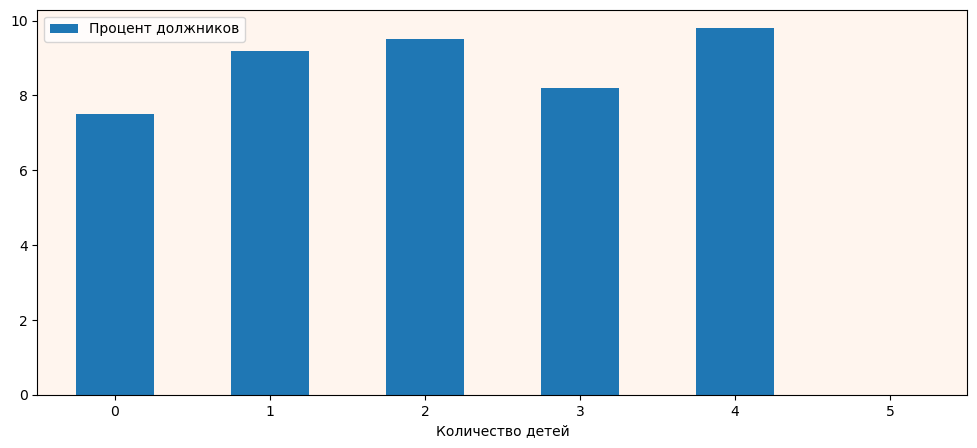

In [34]:
df = pd.DataFrame({'Количество детей': list(children_debt_percentage.index),
                   'Процент должников': list(children_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)

ax = df.plot.bar(x='Количество детей', y='Процент должников', rot=0, figsize=(12, 5))

ax.set_facecolor('seashell')

plt.show()

**Вывод**: Существенных различий между количеством должников в каждой из групп нет. Нулевой показатель в группе, где 5 детей, может оказаться нерепрезентативным, так как там небольшое количество людей: всего 9. Наиболее низкие показатели в группах, где детей 0 или 3, их значения различаются всего лишь на 0.7%. Более высокие показатели (примерно на 2%) в группах, где 1, 2 и 4 детей.  
Показатели для групп с 0 и 3 детьми могут означать отсутствие существенного влияния количества детей на способность возвратить долг в срок. Также, выборка может оказаться не вполне репрезентативной (из-за неравномерного распределения количества людей в каждой группе), из-за чего мы и наблюдаем небольшое различие между средним количеством должников в группах с 0 и 3 детьми (7.85%) и средним количеством в группах с 1, 2 и 4 детьми (9.5%). Таким образом, выкинув потенциально нерепрезентативные выборки, сделаем вывод на основе выборок из людей с количеством детей от 0 до 2. **Итак, наше исследование показывает, что чем меньше детей в семье, тем эффективнее люди отдают долги**

**Далее во всех задачах будем придерживаться той же схемы, что и в задаче выше, поэтому, будем опускать подробности**

**Исследуем зависимость между семейным положением и возвратом кредита в срок**

Количество должников в каждой группе:

In [35]:
family_debts_count = data.groupby('family_status')['debt'].sum().sort_values()

df = pd.DataFrame(data=[list(family_debts_count)], columns=list(family_debts_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,вдовец / вдова,в разводе,не женат / не замужем,гражданский брак,женат / замужем
Количество должников,63,84,273,385,927


Количество людей в каждой группе:

In [36]:
family_count = data.groupby('family_status')['family_status_id'].count().sort_values()

df = pd.DataFrame(data=[list(family_count)], columns=list(family_count.index))
df = df.set_axis(['Количество людей'], axis='index')
display(df)

,вдовец / вдова,в разводе,не женат / не замужем,гражданский брак,женат / замужем
Количество людей,951,1189,2796,4146,12266


Процент должников среди всех людей в каждой группе:

In [37]:
family_debt_percentage = family_debts_count / family_count 
family_debt_percentage = (family_debt_percentage*100).map('{:,.1f}'.format).sort_values()

df = pd.DataFrame(data=[list(family_debt_percentage)], columns=list(family_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,вдовец / вдова,в разводе,женат / замужем,гражданский брак,не женат / не замужем
Процент должников,6.6,7.1,7.6,9.3,9.8


Для наглядности представим результат в виде столбчатой диаграммы:

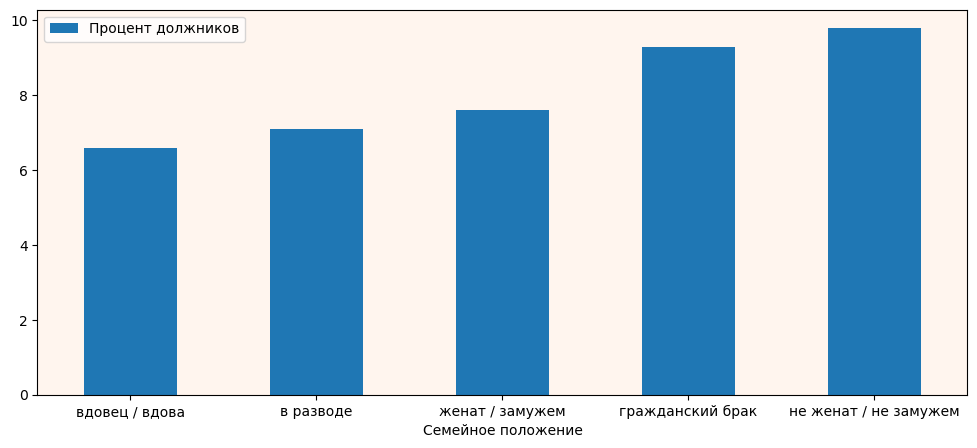

In [38]:
df = pd.DataFrame({'Семейное положение': list(family_debt_percentage.index), 
                   'Процент должников': list(family_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)

ax = df.plot.bar(x='Семейное положение', y='Процент должников', rot=0, figsize=(12, 5))

ax.set_facecolor('seashell')

plt.show()

***Вывод ниже написан в следующих  предположениях: под "гражданским браком" подразумевают сожительство, незарегистрированное официально; под статусом "женат/замужем" подразумевается официально зарегистрированный брак***
   
**Вывод**: Процент должников в каждой категории отличается не очень сильно: самый низкий показатель у вдовцов -- 6.6%. Самый высокий у несостоящих в браке -- 9.8%. Однако прослеживается чёткая тенденция повышения количества долгов в зависимости от семейного положения: чем более опытен человек в брачных/внебрачных отношениях, тем более эффективно он отдаёт долги. Под опытом подразумевается прохождение этапов от неформального сожительства до развода или потери супруга. **Похоже, что люди, связанные формальными семейными обязательствами, более ответственны.**

**Исследуем зависимость между уровнем дохода и возвратом кредита в срок**

Количество должников в каждой группе:

In [39]:
income_debts_count = data.groupby('total_income_category')['debt'].sum()

df = pd.DataFrame(data=[list(income_debts_count)], columns=list(income_debts_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,A,B,C,D,E
Количество должников,2,354,1353,21,2


Количество людей в каждой группе:

In [40]:
income_count = data.groupby('total_income_category')['total_income'].count()

df = pd.DataFrame(data=[list(income_count)], columns=list(income_count.index))
df = df.set_axis(['Количество людей'], axis='index')
display(df)

,A,B,C,D,E
Количество людей,25,5014,15938,349,22


Процент должников среди всех людей в каждой группе:

In [41]:
income_debt_percentage = income_debts_count / income_count 
income_debt_percentage = (income_debt_percentage*100).map('{:,.1f}'.format)

df = pd.DataFrame(data=[list(income_debt_percentage)], columns=list(income_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,A,B,C,D,E
Процент должников,8.0,7.1,8.5,6.0,9.1


Для наглядности представим результат в виде столбчатой диаграммы:

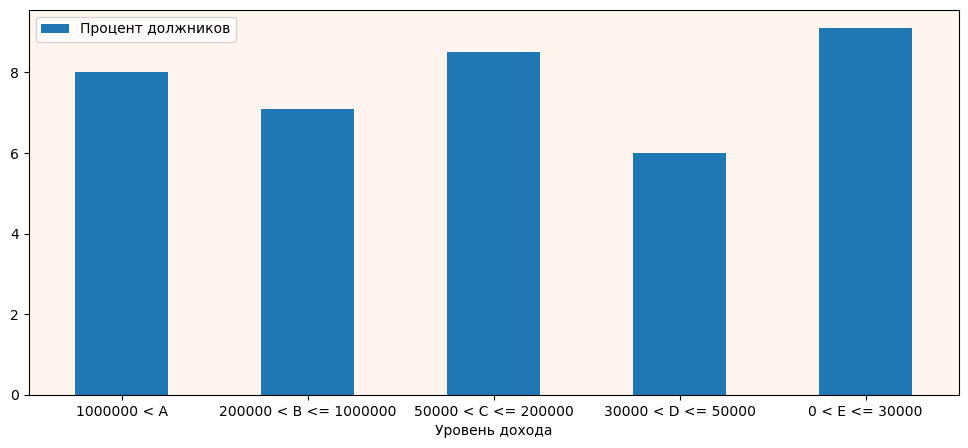

In [42]:
#print(list(income_debt_percentage.index))
index = list(income_debt_percentage.index)
for i in range(len(index)):
    if index[i] == 'A':
        index[i] = '1000000 < ' + 'A'
    if index[i] == 'B':
        index[i] = '200000 < ' + 'B' + ' <= 1000000'
    if index[i] == 'C':
        index[i] = '50000 < ' + 'C' + ' <= 200000'
    if index[i] == 'D':
        index[i] = '30000 < ' + 'D' + ' <= 50000'
    if index[i] == 'E':
        index[i] = '0 < ' + 'E' + ' <= 30000'
    
df = pd.DataFrame({'Уровень дохода': list(index), 'Процент должников': list(income_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)

ax = df.plot.bar(x='Уровень дохода', y='Процент должников', rot=0, figsize=(12, 5))

ax.set_facecolor('seashell')

plt.show()

**Вывод:** Существенной разницы между процентными количествами должников в каждой группе нет. Также нет и прямой зависимости количества должников от уровня дохода: лучше всего возвращают долги люди из категории D с доходом ниже среднего, а люди из категории A со сверхдоходами отстают от D в скорости отдачи долгов на 2 позиции. Такой разброс выглядит подозрительно: есть предположение, что результаты, соответствующие маленьким по количеству людей выборкам не репрезентативны. Внесём коррективы: выкинем из рассмотрения категории A, D и E, где количество людей на порядки меньше, чем в категориях B и C (но это, кажется, и логично, судя по средней заработной плате в московском регионе).**Отсюда можно сделать вывод, что лучше отдают долги люди с более высоким уровнем дохода.**   

**Исследуем влияние разных целей кредита на его возврат в срок**

Количество должников в каждой группе:

In [43]:
purpose_debts_count = data.groupby('purpose_category')['debt'].sum()

df = pd.DataFrame(data=[list(purpose_debts_count)], columns=list(purpose_debts_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
Количество должников,400,780,369,183


Количество людей в каждой группе:

In [44]:
purpose_count = data.groupby('purpose_category')['purpose'].count()

df = pd.DataFrame(data=[list(purpose_count)], columns=list(purpose_count.index))
df = df.set_axis(['Количество должников'], axis='index')
display(df)

,операции с автомобилем,операции с недвижимостью,получение образования,проведение свадьбы
Количество должников,4281,10754,3989,2324


Процент должников среди всех людей в каждой группе:

In [45]:
purpose_debt_percentage = purpose_debts_count / purpose_count 
purpose_debt_percentage = (purpose_debt_percentage*100).map('{:,.1f}'.format).sort_values()

df = pd.DataFrame(data=[list(purpose_debt_percentage)], columns=list(purpose_debt_percentage.index))
df = df.set_axis(['Процент должников'], axis='index')
display(df)

,операции с недвижимостью,проведение свадьбы,операции с автомобилем,получение образования
Процент должников,7.3,7.9,9.3,9.3


Для наглядности представим результат в виде столбчатой диаграммы:

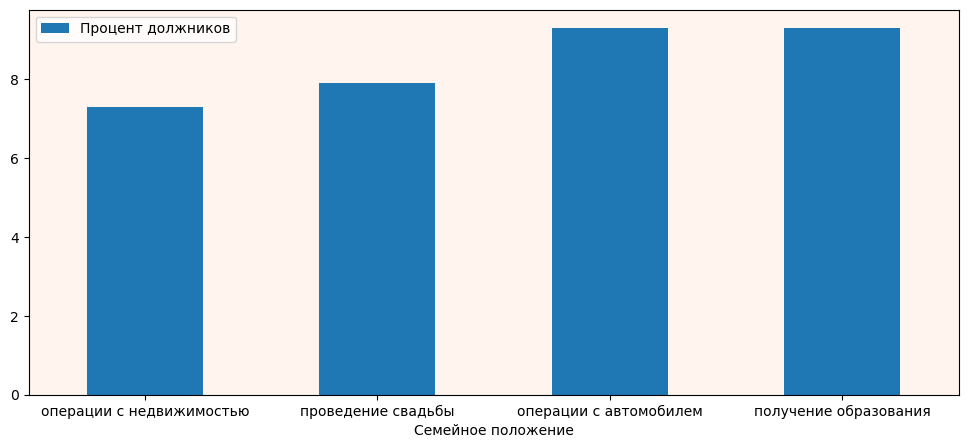

In [46]:
df = pd.DataFrame({'Семейное положение': list(purpose_debt_percentage.index), 
                   'Процент должников': list(purpose_debt_percentage)})
df['Процент должников'] = df['Процент должников'].astype(float)

ax = df.plot.bar(x='Семейное положение', y='Процент должников', rot=0, figsize=(12, 5))

ax.set_facecolor('seashell')

plt.show()

**Вывод:** Охотнее всего возвращаются долги, связанные с операциями с недвижимостью (там 7.3% должников); чуть хуже обстоит дело с долгами на проведением свадьбы (там 7.9% должников). Хуже обстоят дела с займами на операции с автомобилями и на получение образования (в обеих категориях процент должников -- 9.3).

**Возможные причины появления пропусков в исходных данных:**

*Отступление:* То, что одновременно в двух столбцах `days_employed` и `total_income` насчитывается ровно 2174 пропуска, выглядит подозрительно. Было бы странно, чтобы каждый человек, не указавший суммарное количество рабочих дней, решил ещё и не указывать свой доход; также маловероятно, что одинаковое число пропусков сформировалось из тех, кто сделал пропуски только в одной графе. Поэтому, здесь, скорее всего, имеет место быть намеренное искажение данных непонятно кем для непонятно каких учебных целей, ведь в жизни такое навряд ли встретится.

Возможные причины пропусков:

1) Причиной пропусков сразу в двух столбцах может быть техническая ошибка. И вообще, именно в этих двух столбцах тип ячеек `float`, а количество дней в найме бывает только целым; и суммарный доход обычно является целым числом. Стало быть, система могла дать сбой на какой-то определённой группе людей, непонятно по какому критерию.

2) Ещё одной причиной пропусков мог стать некорректный ввод данных. Пропуски могли возникнуть из-за ошибочной обработки введённых клиентом данных системой, например, он хотел указать, что его доход равен 200000, и решил записать это так: 200'000 система не сможет это считать как число.        

3) Причиной пропусков данных в столбце `total_income` могло стать нежелание клиента раскрывать информацию о своих доходах (возможно, он уклоняется от налогов). Причиной появления пропусков в столбце `days_employed` также могло стать нежелание раскрывать информацию: так, например, число дней в найме могло не согласовываться с суммарным доходом и статусом сотрудника (могли иметь место нелегальные источники дохода).

З**аполнение пропусков медианным значением — лучшее решение для количественных переменных:**

Заполнение пропусков средним значением может привести к искажению данных, так как среди всех, допустим, 100000 переменных может найтись одна такая, которая резко отличается от всех остальных в одну или другую сторону; эта переменная сильно повлияет на значение для среднего. Медиана же делит отсортированную выборку на две примерно равных по объёму части, такая оценка исключает влияние аномальных элементов выборки, которые будут находиться в конце или начале.

## Общий вывод

**Вывод:** Во всех случаях процент должников в данной группе составлял от 6% до 10% от общего числа людей. Разность процентных значений в группах данного разбиения не превосходила 3%. Неожиданные промежуточные значения в результатах исследований можно обьяснить небольшим количеством людей в некоторых выборках, из-за чего они могли стать нерепрезентативными (так, например, вычисления при изучении связи между уровнем дохода и возвратом кредита в срок показали, что более состоятельные клиенты подходят к выплатам кредитов менее ответственно, чем клиенты со средним доходом, число клиентов в каждой группе различается на порядок). 
    
*Небольшое резюме по каждому мини-исследованию:*
    
В первом эксперименте с разбиением людей на группы по количеству детей оказалось, что лучше всего отдают долги бездетные. Во втором эксперименте с разбиением людей на группы по семейному положению лучше всех отдают долги вдовцы: в этой группе процент должников равен 6.6%, хуже всех -- люди, не состоящие в отношениях. В третьем эксперименте с разбиением людей на группы по уровню дохода наблюдается следующая тенденция: чем больше человек зарабатывает, тем лучше он отдаёт долги. В группировке по целям займа наименьший процент должников оказался в группе операций с недвижимостью -- 7.3%, наибольший процент равный 9.3 -- в группах с операциями с автомобилем и получением образования. 

**Наиболее сильная корреляция количества должников от изучаемого фактора оказалась в разбиение на группы по семейному положению. На втором месте по значимости можно оставить уровень дохода. На третьем -- количество детей. На четвёртом -- цель займа.**